In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Asus\Downloads\archive (34)\IMDB Top 250 Movies.csv")

In [3]:
df.isnull().sum()

rank           0
name           0
year           0
rating         0
genre          0
certificate    0
run_time       0
tagline        0
budget         0
box_office     0
casts          0
directors      0
writers        0
dtype: int64

In [4]:
df.dtypes

rank             int64
name            object
year             int64
rating         float64
genre           object
certificate     object
run_time        object
tagline         object
budget          object
box_office      object
casts           object
directors       object
writers         object
dtype: object

In [5]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['box_office'] = pd.to_numeric(df['box_office'], errors='coerce')

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

rank            0
name            0
year            0
rating          0
genre           0
certificate     0
run_time        0
tagline         0
budget         44
box_office     33
casts           0
directors       0
writers         0
dtype: int64

In [8]:
df['budget']=df['budget'].fillna(df['budget'].median())
df['box_office']=df['box_office'].fillna(df['box_office'].median())

In [9]:
df.isnull().sum()

rank           0
name           0
year           0
rating         0
genre          0
certificate    0
run_time       0
tagline        0
budget         0
box_office     0
casts          0
directors      0
writers        0
dtype: int64

In [12]:
#df.to_csv("JASVEER_cleaned_imdb_top_250.csv", index=False)

C:\Users\Asus\AppData\Local\Temp\ipykernel_2316\1807692321.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='Genre', y='Count', palette='Set2')


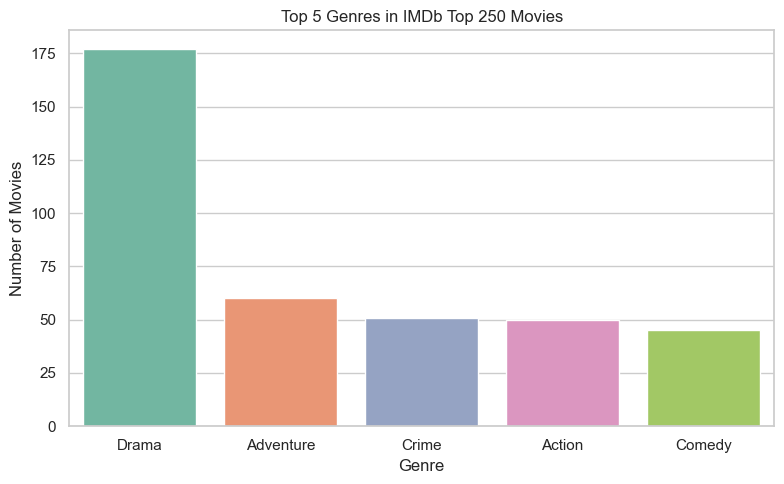

In [24]:
df['genre_list'] = df['genre'].str.split(',')
genre_exploded = df.explode('genre_list')

# Count the number of occurrences of each genre
genre_df = genre_exploded['genre_list'].value_counts().reset_index()
genre_df.columns = ['Genre', 'Count']

# Get top 5 genres
top_genres = genre_df.head(5)

# Plot visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=top_genres, x='Genre', y='Count', palette='Set2')
plt.title('Top 5 Genres in IMDb Top 250 Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

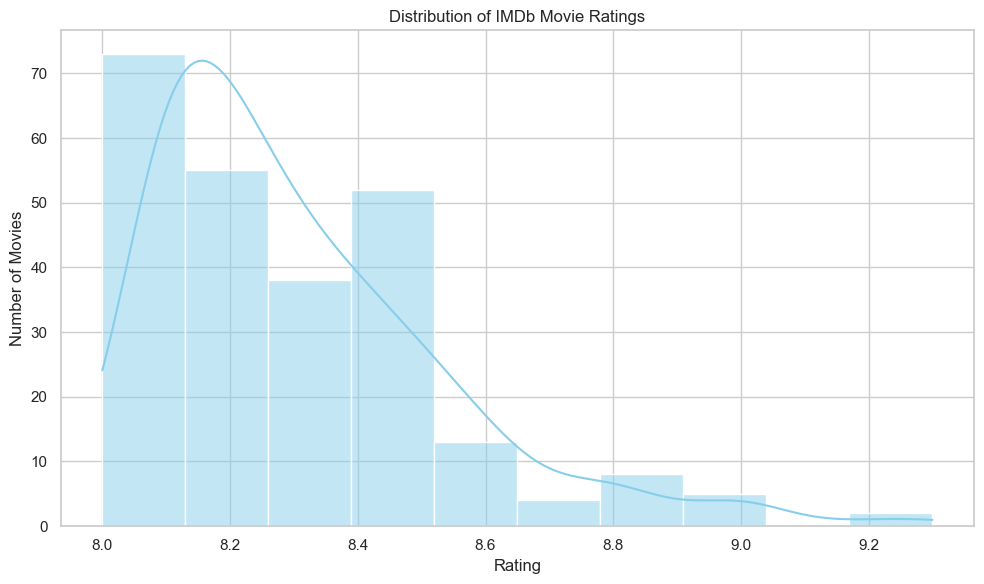

In [25]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Plot rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of IMDb Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

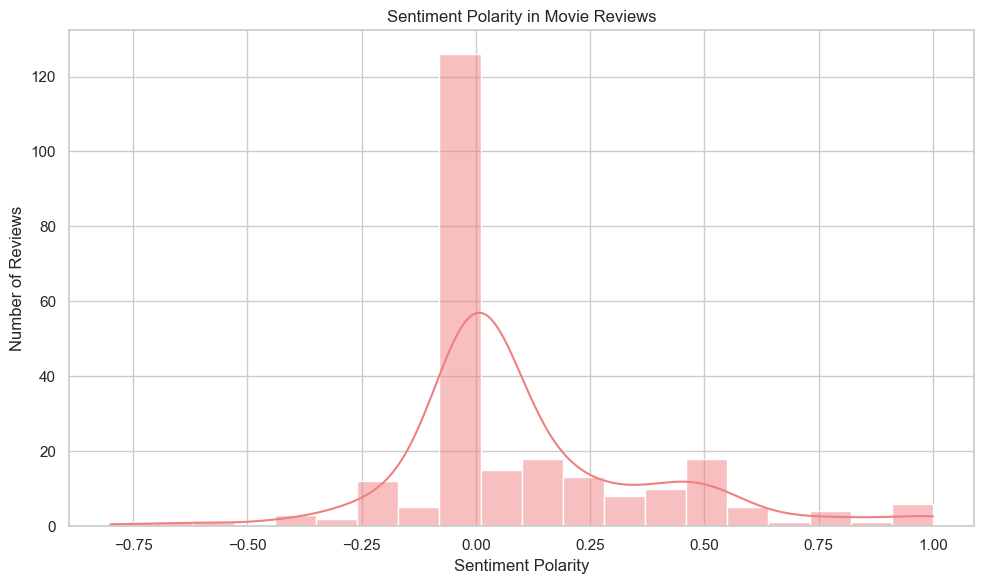

In [26]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'review' column exists before applying sentiment analysis
if 'review' in df.columns:
    df['sentiment'] = df['review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

    # Plot sentiment distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['sentiment'], bins=20, kde=True, color='lightcoral')
    plt.title('Sentiment Polarity in Movie Reviews')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Number of Reviews')
    plt.tight_layout()
    plt.show()
else:
    print("The DataFrame does not contain a 'review' column.")


C:\Users\Asus\AppData\Local\Temp\ipykernel_2316\3482133047.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='decade', y='rating', ax=axes[0], palette='coolwarm')


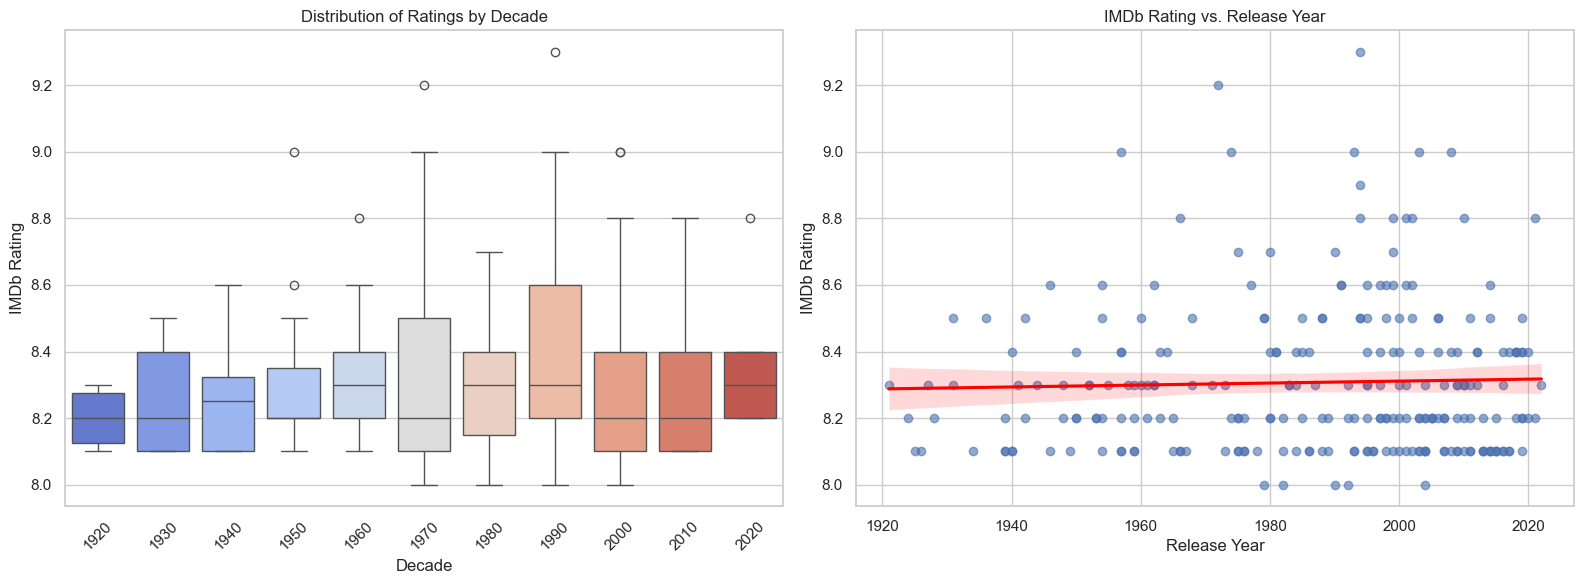

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'year' to decade
df['decade'] = (df['year'] // 10) * 10

# Set the plot style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Boxplot: Ratings by Decade
sns.boxplot(data=df, x='decade', y='rating', ax=axes[0], palette='coolwarm')
axes[0].set_title('Distribution of Ratings by Decade')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('IMDb Rating')
axes[0].tick_params(axis='x', rotation=45)

# 2. Scatterplot: Rating vs. Year
sns.regplot(data=df, x='year', y='rating', ax=axes[1], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
axes[1].set_title('IMDb Rating vs. Release Year')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('IMDb Rating')

plt.tight_layout()
plt.show()


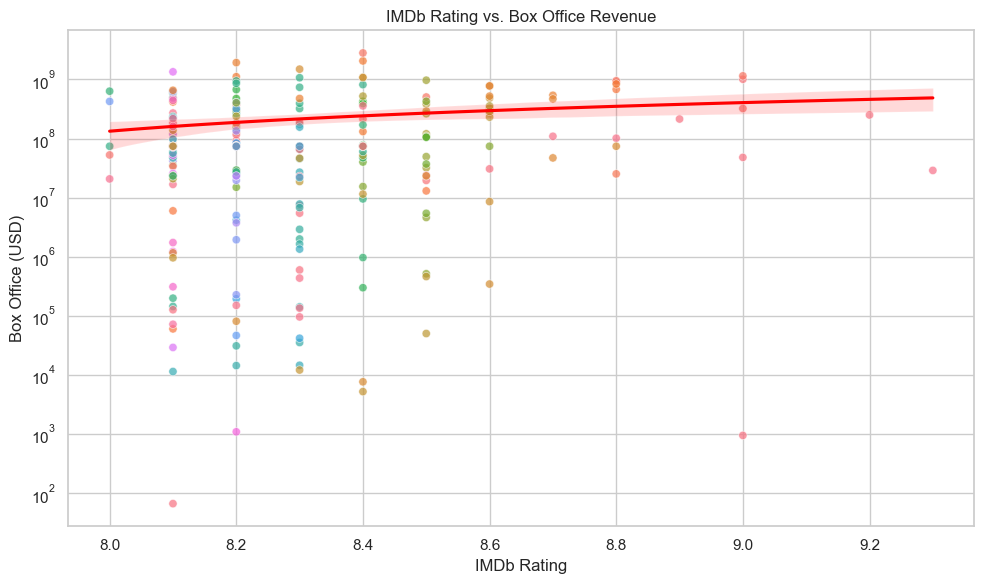

In [15]:
# Convert box_office column to numeric, handling missing values and commas
df['box_office_cleaned'] = pd.to_numeric(df['box_office'].astype(str).str.replace(',', ''), errors='coerce')

# Create scatterplot: Rating vs Box Office
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rating', y='box_office_cleaned', hue='genre', alpha=0.7, legend=False)
sns.regplot(data=df, x='rating', y='box_office_cleaned', scatter=False, color='red')

plt.title('IMDb Rating vs. Box Office Revenue')
plt.xlabel('IMDb Rating')
plt.ylabel('Box Office (USD)')
plt.yscale('log')  # Use log scale for better visibility
plt.tight_layout()
plt.show()
